In [2]:
import pandas as pd

**Домашнее задание к лекции.

Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
  - оценка 2 и меньше - низкий рейтинг
  - оценка 4 и меньше - средний рейтинг
  - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [101]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [96]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [102]:
# Функция считает среднее рейтинг для фильма
def groupby_rating(data):
    return data['rating'].mean()
# Групируем по посчитаному рейтингу
id_rating_mean = ratings.groupby('movieId').apply(groupby_rating)

In [103]:
# Переводим сериес в фрейм
id_rating_mean = id_rating_mean.to_frame()

In [104]:
# Сбрасываем индекс со столбца movieId и выстраиваем его заново
id_rating_mean = id_rating_mean.reset_index()

In [105]:
# Переназываем столбцы
id_rating_mean.columns = ['movieId', 'mean_rating']
id_rating_mean

,movieId,mean_rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [106]:
# Сливаем две базы данных по столбцу movieid
data = movies.merge(id_rating_mean, on='movieId', how = 'left')

In [107]:
# Убираем все фильмы без рейтинга
data = data.dropna()
print(data.shape)

(9724, 4)


In [108]:
# Функция классифицирует подающиеся на неё данные, на 3 группы
def star_rating(m_rating):
    if m_rating <= 2:
        return 'low'
    elif m_rating <= 4:
        return 'mid'
    else: 
        return 'hi' 

In [110]:
# Прогоняем все значения столбца 'mean_rating' через функию и записываем значения в новый столбец 'class'
data['class'] = data['mean_rating'].apply(star_rating)
data

,movieId,title,genres,mean_rating,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,mid
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,mid
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,mid
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,mid
4,5,Father of the Bride Part II (1995),Comedy,3.071429,mid
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,mid
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,mid
9739,193585,Flint (2017),Drama,3.500000,mid
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,mid


,movieId,title,genres,mean_rating,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,mid
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,mid
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,mid
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,mid
4,5,Father of the Bride Part II (1995),Comedy,3.071429,mid
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,mid
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,mid
9739,193585,Flint (2017),Drama,3.500000,mid
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,mid


**Задание 2**
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [204]:
keywords = pd.read_csv('keywords.csv')

In [205]:
keywords

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195
...,...,...
99995,эльдорадо старый оскол,3705
99996,frigate для firefox,3630
99997,укрсиб,3630
99998,погода в ялте на неделю,3688


In [206]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [207]:
# Разворачиваем словарь
reverse_dict = {val: key for key, values in geo_data.items() for val in values}


In [214]:
# Ищет совпадения по первым 3 буквам
def key_(row):
    for key, val in reverse_dict.items():
        if key[:3] in row.keyword:
            return val
    return 'undefined'

In [209]:
keywords['region'] = keywords.apply(key_, axis=1)


In [210]:
keywords

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined
...,...,...,...
99995,эльдорадо старый оскол,3705,undefined
99996,frigate для firefox,3630,undefined
99997,укрсиб,3630,undefined
99998,погода в ялте на неделю,3688,undefined


In [212]:
keywords = keywords.sort_values('region', ascending=False)
keywords

,keyword,shows,region
74683,е1 екатеринбург недвижимость,14100,Центр
79147,москоу пост,4516,Центр
34136,московская сага сериал актеры,9925,Центр
9487,работа в москве с ежедневной оплатой от 2000 т...,28651,Центр
34139,домострой,9662,Центр
...,...,...,...
98870,невеста из села,3949,undefined
99005,chevrolet lacetti,3786,undefined
99006,гримм 6 сезон скачать торрент,4627,undefined
99007,дуализм,3663,undefined


In [ ]:
# регулярное выражение, не разобралась
# mask = df["column_name"].str.contains(r"<reg_exp>")
# res = df.loc[mask]

**Задание 3 (бонусное)**
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
  - для каждой строки пройдите по всем годам списка years
  - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
  - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [48]:
years =[]

In [51]:
for year in range(1950, 2011):
    years.append(year)

In [119]:
ratings_big = pd.read_csv('ratings_b.csv')

In [120]:
movies_big = pd.read_csv('movies_b.csv')

In [121]:
id_rating_b_mean = ratings_big.groupby('movieId').apply(groupby_rating)

In [122]:
id_rating_b_mean.shape

(9066,)

In [123]:
id_rating_b_mean = id_rating_b_mean.to_frame()
id_rating_b_mean = id_rating_b_mean.reset_index()
id_rating_b_mean.columns = ['movieId', 'mean_rating']
id_rating_b_mean
mov_data = movies_big.merge(id_rating_b_mean, on='movieId', how = 'left')

In [124]:
mov_data

,movieId,title,genres,mean_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),NaN
58094,193878,Les tribulations d'une caissière (2011),Comedy,NaN
58095,193880,Her Name Was Mumu (2016),Drama,NaN
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,NaN


In [127]:
# функция проверяет есть ли год в столбце title и сравнивает его со списко
def production_year(row):
    for year in years:
        year_st = str(year)
        if year_st in row.title:
            return year
    return 1900

# Добавляет в новый столбец, год, который вернула функция
mov_data['year'] = mov_data.apply(production_year, axis=1)
mov_data

,movieId,title,genres,mean_rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615,1995
4,5,Father of the Bride Part II (1995),Comedy,3.267857,1995
...,...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),NaN,1900
58094,193878,Les tribulations d'une caissière (2011),Comedy,NaN,1900
58095,193880,Her Name Was Mumu (2016),Drama,NaN,1900
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,NaN,1900


In [135]:
# Функция возвращает среднее значение
def groupby_function(data):
    return data.mean_rating.mean()
# Группировка среднего значения по годам
rate_year= mov_data.groupby('year').apply(groupby_function)
rate_year

year
1900    3.243266
1950    3.436538
1951    3.906653
1952    3.802318
1953    3.738878
          ...   
2006    3.265219
2007    3.381744
2008    3.237304
2009    3.212944
2010    3.201324
Length: 62, dtype: float64

In [136]:
movies_rate_year = rate_year.to_frame()
movies_rate_year = rate_year.reset_index()
movies_rate_year.columns = ['year', 'mean_rating']
movies_rate_year



# data.sort_values('quantity', ascending=False).head()

,year,mean_rating
0,1900,3.243266
1,1950,3.436538
2,1951,3.906653
3,1952,3.802318
4,1953,3.738878
...,...,...
57,2006,3.265219
58,2007,3.381744
59,2008,3.237304
60,2009,3.212944


In [146]:
movies_rate_year_sort_r = movies_rate_year.sort_values('mean_rating', ascending=False)

In [148]:
movies_rate_year_sort_r

,year,mean_rating
2,1951,3.906653
3,1952,3.802318
13,1962,3.772962
4,1953,3.738878
8,1957,3.693322
...,...,...
53,2002,3.191918
48,1997,3.183169
41,1990,3.166759
54,2003,3.154081


In [140]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of TV show by ratings')

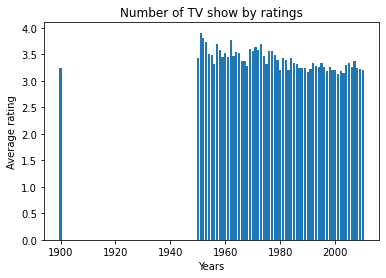

In [149]:
# Выводим график
plt.bar(movies_rate_year_sort_r['year'], movies_rate_year_sort_r['mean_rating'])
plt.xlabel('Years')
plt.ylabel('Average rating')
plt.title('Number of TV show by ratings')
# plt.text(20000, 0.5, 'Most common name')
# plt.grid()

Всё так, рейтинг потихоньку скатывается! ))